# Line of sight

Import the required modules.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Terrain

Define a function that creates the "terrain", i.e., two numpy arrays, the first will contain the distance from the origin, the second the altitude.

In [127]:
def create_terrain(n=20, distance=30.0, mu=1.0, sigma=0.5, flat_fraction=0.05):
    n_flat = int(n*flat_fraction)
    altitudes = np.empty(n)
    altitudes[0:n_flat] = 0.0
    altitudes[n_flat:] = np.random.normal(mu, sigma, size=(n - n_flat,)).cumsum()
    distances = np.linspace(0.0, distance, n)
    return distances, altitudes

The semantics of the function arguments is:

  * `n`: number of points for the terrain,
  * `distance`: distance represented by these points,
  * `mu`: average altitude change per point,
  * `sigma`: standard deviation of altitude change per point,
  * `flat_fraction`: fraction of the terrain near the origin that is flat.

Function to plot the terrain.

In [120]:
def plot_terrain(distances, altitudes):
    figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
    axes.plot(distances, altitudes)
    axes.set_aspect('equal')
    return figure, axes

Below is an example computed with the default values.

In [105]:
distances, altitudes = create_terrain()

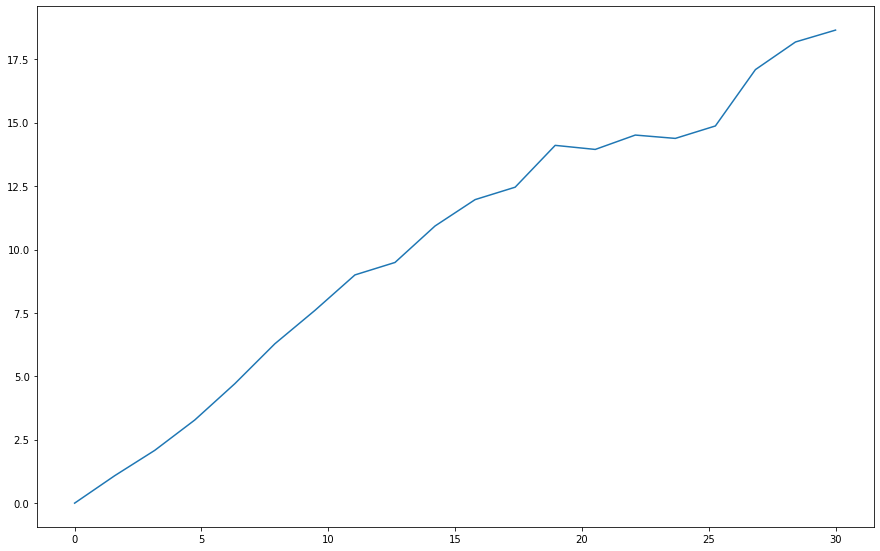

In [109]:
_ = plot_terrain(distances, altitudes)

## Visibility

Define a function to compute the elevation angle for each point with respect to the first.

In [51]:
def compute_angles(distances, altitudes):
    return np.arctan2(altitudes, distances)

Define a function to compute the visibility for each point.

In [55]:
def  compute_visibility(distances, altitudes):
    angles = compute_angles(distances, altitudes)
    visibility = []
    max_angle = np.finfo(dtype=np.float64).min
    for angle in angles:
        if angle > max_angle:
            max_angle = angle
            visibility.append(True)
        else:
            visibility.append(False)
    return np.array(visibility, dtype=np.bool)

Define a function to filter all points that are visible from the origin, i.e., the first point.

In [56]:
compute_visibility(distances, altitudes)

array([ True,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [57]:
def  compute_visibles(distances, altitudes):
    angles = compute_angles(distances, altitudes)
    x_visible = []
    y_visible = []
    max_angle = np.finfo(dtype=np.float64).min
    for angle, distance, altitude in zip(angles, distances, altitudes):
        if angle > max_angle:
            max_angle = angle
            x_visible.append(distance)
            y_visible.append(altitude)
    return np.array(x_visible), np.array(y_visible)

Define a function to complete the line of sight.

In [135]:
def complete_visible(x_visible, y_visible, max_distance):
    max_altitude = y_visible[-1]*max_distance/x_visible[-1]
    return np.append(x_visible, max_distance), np.append(y_visible, max_altitude)

Define a function to plot the terrain, and mark the "line of sight" in red.

In [132]:
def plot_visible(distances, altitudes):
    figure, axes = plot_terrain(distances, altitudes)
    x_visibles, y_visibles = compute_visibles(distances, altitudes)
    x_visibles, y_visibles = complete_visible(x_visibles, y_visibles, distances[-1])
    axes.plot(x_visibles, y_visibles, color='red')
    return figure, axes

Below we have an example

In [136]:
distances, altitudes = create_terrain(n=500, distance=30.0, mu=0.02, sigma=0.05, flat_fraction=0.2)

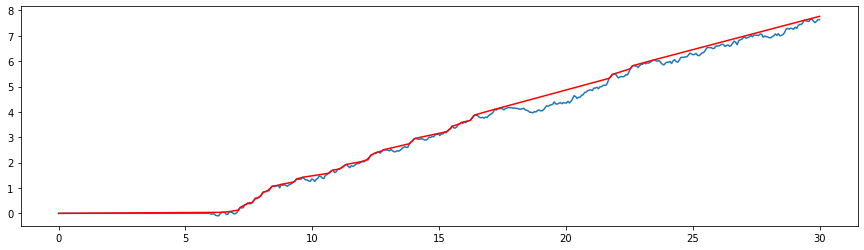

In [137]:
_ = plot_visible(distances, altitudes)

All points on the red line are visible, the points below the red line are invisible from the origin.

In [138]:
distances, altitudes = create_terrain(n=500, distance=30.0, mu=0.02, sigma=0.05, flat_fraction=0.01)

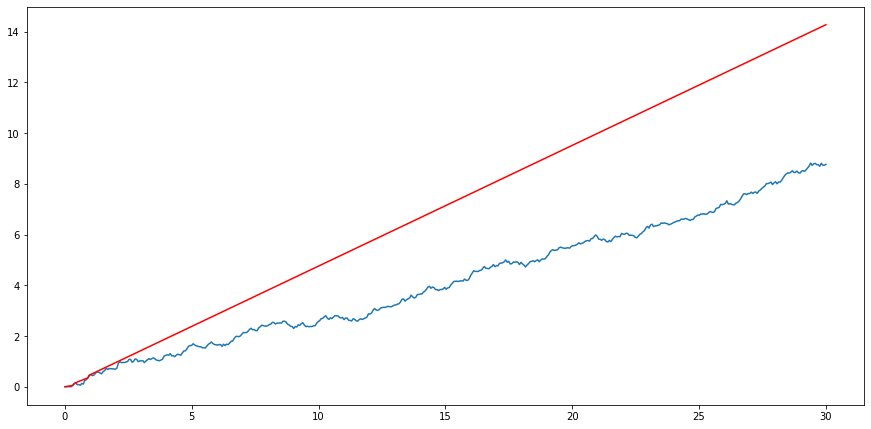

In [139]:
_ = plot_visible(distances, altitudes)